In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal, Annotated
from operator import add

In [2]:
class CounterState(TypedDict):
    counter: int
    max_count:int 
    history: Annotated[list[int], add]

In [15]:
def increment(state: CounterState) -> CounterState:
    """Increment counter and record in history"""
    new_count = state["counter"] + 1
    print(f"Iteration {new_count}")
    return {
        "counter": new_count,
        "history": [new_count]
    }

def should_continue(state: CounterState) -> Literal["continue", "end"]:
    """Check if we should continue looping"""
    if state["counter"] >= state["max_count"]:
        return "end"
    return "continue"








In [16]:
# Build graph
graph = StateGraph(CounterState)
graph.add_node("increment", increment)

graph.add_edge(START, "increment")
graph.add_conditional_edges(
    "increment",
    should_continue,
    {
        "continue": "increment",  # Loop back to itself!
        "end": END
    }
)

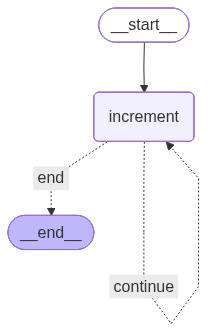

In [17]:
workflow = graph.compile()
workflow

In [19]:
# Run

intial_state = {
    "counter" : 0,
    "max_count" : 10,
    "history" : []
}

# result = workflow.invoke({
#     "counter": 0,
#     "max_count": 10,
#     "history": []
# })

# workflow.invoke(intial_state)
result = workflow.invoke(intial_state)

print(result)
# Output: {'counter': 5, 'max_count': 5, 'history': [1, 2, 3, 4, 5]}

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
{'counter': 10, 'max_count': 10, 'history': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
